In [4]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [6]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)

Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [7]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [8]:
data = pd.read_csv('./../data/SEATGURU_INFO_AIRCRAFT.csv', sep = ';')
data.index = range(2, len(data) + 2)

In [9]:
data.head()

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
2,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
3,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
4,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
5,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
6,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1


In [10]:
data.columns

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')

### Création CSV avec les images et les lignes correspondantes

In [11]:
data['airline_aircraft'] = data.apply(lambda x: x['Airline_name'].replace('-', '_') + '_' + x['Aircraft_Type'].replace(' ', '_'), axis = 'columns')
liste_image = os.listdir('./../data/LAYOUT SEATGURU/')
l_result = []
for i in liste_image:
    for j in data['airline_aircraft'].unique():
        if j.lower() in i.lower():
            l_result.append((i, j))

new_df = pd.DataFrame(list(zip([i[0] for i in l_result], [i[1] for i in l_result])), columns =['image', 'avion'])

In [12]:
df_temp = new_df[['avion', 'image']]

In [13]:
df_temp = pd.DataFrame([list(data.groupby('airline_aircraft').groups.keys()), [list(i) for i in list(data.groupby('airline_aircraft').groups.values())]], index = ['avion', 'lignes']).T

In [14]:
df_temp = df_temp.sort_values('lignes').reset_index(drop = True)

In [15]:
new_df = new_df.merge(df_temp, how='outer', on='avion').dropna()

In [16]:
new_df.drop('avion', axis = 'columns', inplace = True)

In [17]:
new_df.head()

,image,lignes
0,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,"[2, 3, 4, 5, 6]"
1,Aegean_Airlines_Airbus_A320-200_plane2.svg.png,"[7, 8, 9, 10, 11, 12]"
2,Aegean_Airlines_Airbus_A321-200_plane1.svg.png,"[13, 14, 15, 16, 17, 18, 19]"
3,Aegean_Airlines_Airbus_A321-200_plane3.svg.png,"[13, 14, 15, 16, 17, 18, 19]"
4,Aegean_Airlines_ATR_42-600_plane2.svg.png,"[20, 21, 22, 23, 24]"


In [ ]:
# new_df.to_csv('./../data/Image_lignes.csv', sep = ';')

### Template Matching

In [ ]:
path = './../data/LAYOUT SEATGURU/'
df = pd.DataFrame({'img': os.listdir('./../data/LAYOUT SEATGURU/'), 'chemin': [path + img_name for img_name in os.listdir('./../data/LAYOUT SEATGURU/')]})

In [ ]:
df.head(10)

In [ ]:
df[df['img'] == 'Qatar_Airways_Boeing_777-300ER_plane737.svg.png']

In [ ]:
df['chemin'][8]

In [ ]:
img = plt.imread(df['chemin'][8])
figure = plt.figure(figsize = (10, 15))
plt.imshow(img)

In [ ]:
# Read the main image 
img_rgb = cv2.imread('./../data/LAYOUT SEATGURU/Qatar_Airways_Boeing_777-300ER_plane737.svg.png')
  
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  
# Read the template
template = cv2.imread('./images/temp_normal_seat.jpg', 0)    # Restaurant
# template = cv2.imread('./images/temp_normal_seat.jpg', 0)    # Siège

# Store width and height of template in w and h 
w, h = template.shape[::-1]
  
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
  
# Specify a threshold 
threshold = 0.35
  
# Store the coordinates of matched area in a numpy array 
loc = np.where( res >= threshold)
  
# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    print('oui')

# Show the final image with the matched area. 
cv2.imshow('Detected', img_rgb)
cv2.waitKey(0)

In [ ]:
img_rgb = cv2.imread('./../data/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./images/templateTest.jpg', 0)
w, h = template.shape[::-1]

cv2.imshow('template', template)
cv2.waitKey(0)

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    print('i')

cv2.imwrite('res.png',img_rgb)
cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

### Multiple Scale Template Matching

In [ ]:
import numpy as np
import argparse
import imutils
import glob
import cv2

In [ ]:
image_debut = './../data/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg'
template_base = './images/templateBusinessElectricity.jpg'

In [ ]:
# Python program to illustrate  
# multiscaling in template matching 
import cv2 
import numpy as np 
   
# Read the main image 
img_rgb = cv2.imread(image_debut) 
   
# Convert to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
   
# Read the template 
template = cv2.imread(template_base, 0) 
   
# Store width and height of template in w and h 
w, h = template.shape[::-1] 
found = None
  
for scale in np.linspace(0.2, 1.0, 20)[::-1]: 
  
    # resize the image according to the scale, and keep track 
    # of the ratio of the resizing 
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale)) 
    r = img_gray.shape[1] / float(resized.shape[1]) 
   
    # if the resized image is smaller than the template, then break 
    # from the loop 
    # detect edges in the resized, grayscale image and apply template  
    # matching to find the template in the image edged  
    # = cv2.Canny(resized, 50, 200) result = cv2.matchTemplate(edged, template, 
    # cv2.TM_CCOEFF) (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 
    # if we have found a new maximum correlation value, then update 
    # the found variable if found is None or maxVal > found[0]: 
    if resized.shape[0] < h or resized.shape[1] < w: 
            break
    found = (maxVal, maxLoc, r) 

# unpack the found varaible and compute the (x, y) coordinates 
# of the bounding box based on the resized ratio 
(_, maxLoc, r) = found 
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)) 
  
# draw a bounding box around the detected result and display the image 
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2) 
cv2.imshow("Image", image)
cv2.waitKey(0)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
                                            
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

# With data augmentation to prevent overfitting (accuracy 0.99286)

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)

# Fit the model
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])
                              
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Post Process

#### Aligner les points et supprimer les doublons

In [18]:
# align all coordinates of the pixels
def align(liste):
    # First two lines if the first list is a list of tuples
#     liste_x = [i[0] for i in liste]
#     liste_y = [i[1] for i in liste]
    # Separate x and y if we have a list of numbers like [x1, y1, x2, y2, ...]
    liste_x = [liste[i] for i in range(len(liste)) if i % 2 == 0]
    liste_y = [liste[i] for i in range(len(liste)) if i % 2 == 1]
    
    serie_x = pd.Series(liste_x).value_counts().sort_index()
    serie_y = pd.Series(liste_y).value_counts().sort_index()
    
    px_rare_x = list(serie_x.loc[serie_x <= 3].index)
    px_nb_x = list(serie_x.loc[serie_x > 3].index)
    
    px_rare_y = list(serie_y.loc[serie_y <= 3].index)
    px_nb_y = list(serie_y.loc[serie_y > 3].index)
    
    for i in range(len(liste_x)):
        if liste_x[i] in px_rare_x:
            liste_dist = list(abs(np.array(px_nb_x) - liste_x[i]))
            index = liste_dist.index(min(liste_dist))
            liste_x[i] = px_nb_x[index]
        if liste_y[i] in px_rare_y:
            liste_dist = list(abs(np.array(px_nb_y) - liste_y[i]))
            index = liste_dist.index(min(liste_dist))
            liste_y[i] = px_nb_y[index]
    
    liste_coord = zip(liste_x, liste_y)
    return list(liste_coord)

In [19]:
# Remove all the double detection of one object
def remove_double_detection(liste : list):
    serie = pd.Series(liste).value_counts()
    tuples = serie.loc[serie > 1].index
    for i in tuples:
        liste.remove(i)
    return liste

In [20]:
liste_coord = [146, 517,
133, 537,
146, 537,
185, 537,
198, 537,
211, 537,
224, 537,
263, 537,
276, 537,
133, 557,
146, 557,
185, 557,
198, 557,
211, 557,
224, 557,
263, 557,
276, 557,
133, 577,
146, 577,
185, 577,
198, 577,
211, 577,
224, 577,
263, 577,
276, 577,
133, 597,
146, 597,
185, 597,
198, 597,
211, 597,
224, 597,
263, 597,
276, 597,
133, 617,
146, 617,
185, 617,
198, 617,
211, 617,
224, 617,
263, 617,
276, 617,
133, 637,
146, 637,
185, 637,
198, 637,
211, 637,
224, 637,
263, 637,
276, 637,
133, 657,
146, 657,
185, 657,
198, 657,
211, 657,
224, 657,
263, 657,
276, 657,
133, 677,
146, 677,
185, 677,
198, 677,
211, 677,
224, 677,
263, 677,
276, 677,
133, 697,
146, 697,
185, 697,
198, 697,
211, 697,
224, 697,
263, 697,
276, 697,
133, 717,
146, 717,
185, 717,
198, 717,
211, 717,
224, 717,
263, 717,
276, 717,
133, 737,
146, 737,
185, 737,
198, 737,
211, 737,
224, 737,
263, 737,
276, 737,
133, 757,
146, 757,
185, 757,
198, 757,
211, 757,
224, 757,
263, 757,
276, 757,
133, 777,
146, 777,
185, 777,
198, 777,
211, 777,
224, 777,
263, 777,
276, 777,
133, 797,
146, 797,
185, 797,
198, 797,
211, 797,
224, 797,
263, 797,
276, 797,
133, 817,
146, 817,
185, 817,
198, 817,
211, 817,
224, 817,
263, 817,
276, 817,
133, 837,
146, 837,
185, 837,
198, 837,
211, 837,
224, 837,
263, 837,
276, 837,
133, 857,
146, 857,
263, 857,
276, 857,
133, 971,
146, 971,
185, 971,
198, 971,
211, 971,
224, 971,
263, 971,
276, 971,
133, 991,
146, 991,
185, 991,
198, 991,
211, 991,
224, 991,
263, 991,
276, 991,
133, 1011,
146, 1011,
185, 1011,
198, 1011,
211, 1011,
224, 1011,
263, 1011,
276, 1011,
133, 1031,
146, 1031,
185, 1031,
198, 1031,
211, 1031,
224, 1031,
263, 1031,
276, 1031,
133, 1051,
146, 1051,
185, 1051,
198, 1051,
211, 1051,
224, 1051,
263, 1051,
276, 1051,
133, 1071,
146, 1071,
185, 1071,
198, 1071,
211, 1071,
224, 1071,
263, 1071,
276, 1071,
133, 1091,
146, 1091,
185, 1091,
198, 1091,
211, 1091,
224, 1091,
263, 1091,
276, 1091,
133, 1111,
146, 1111,
185, 1111,
198, 1111,
211, 1111,
224, 1111,
263, 1111,
276, 1111,
133, 1131,
146, 1131,
185, 1131,
198, 1131,
211, 1131,
224, 1131,
263, 1131,
276, 1131,
135, 1151,
148, 1151,
261, 1151,
274, 1151,
137, 1171,
150, 1171,
191, 1171,
204, 1171,
217, 1171,
259, 1171,
272, 1171,
139, 1191,
152, 1191,
191, 1191,
204, 1191,
217, 1191]

In [21]:
l_test = align(liste_coord)

#### Clusters

In [22]:
x = [a for a,b in l_test]
y = [b for a,b in l_test]

In [23]:
from sklearn.cluster import KMeans

[[ 248.30434783 1106.65217391]
 [ 207.5952381   694.14285714]
 [ 200.4893617   583.80851064]
 [ 204.5         802.45454545]
 [ 200.6        1012.        ]
 [ 163.68       1139.8       ]]


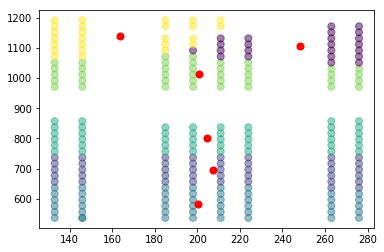

In [24]:
model = KMeans(n_clusters=6)
kmeans = model.fit(l_test)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(x, y, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [189]:
from sklearn.mixture import GaussianMixture

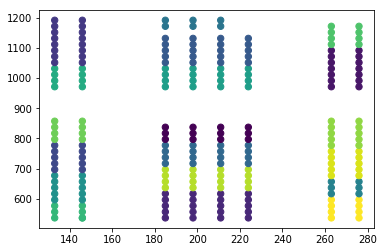

In [179]:
gmm = GaussianMixture(n_components=19).fit(l_test)
labels = gmm.predict(l_test)
plt.scatter(x, y, c=labels, s=40, cmap='viridis');

In [25]:
import sklearn
from sklearn.cluster import DBSCAN

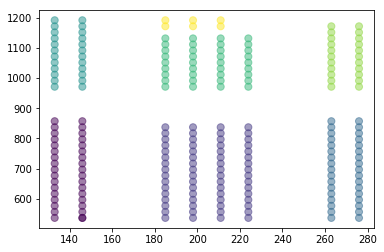

In [35]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(l_test)
plt.scatter(x, y, c=dbscan.labels_.astype(float), s=50, alpha=0.5)

In [169]:
dbscan.components_

array([[ 146,  537],
       [ 133,  537],
       [ 146,  537],
       [ 198,  537],
       [ 211,  537],
       [ 133,  557],
       [ 146,  557],
       [ 185,  557],
       [ 198,  557],
       [ 211,  557],
       [ 224,  557],
       [ 263,  557],
       [ 276,  557],
       [ 133,  577],
       [ 146,  577],
       [ 185,  577],
       [ 198,  577],
       [ 211,  577],
       [ 224,  577],
       [ 263,  577],
       [ 276,  577],
       [ 133,  597],
       [ 146,  597],
       [ 185,  597],
       [ 198,  597],
       [ 211,  597],
       [ 224,  597],
       [ 263,  597],
       [ 276,  597],
       [ 133,  617],
       [ 146,  617],
       [ 185,  617],
       [ 198,  617],
       [ 211,  617],
       [ 224,  617],
       [ 263,  617],
       [ 276,  617],
       [ 133,  637],
       [ 146,  637],
       [ 185,  637],
       [ 198,  637],
       [ 211,  637],
       [ 224,  637],
       [ 263,  637],
       [ 276,  637],
       [ 133,  657],
       [ 146,  657],
       [ 185,

In [168]:
dbscan.core_sample_indices_

array([  0,   1,   2,   4,   5,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 124, 125, 127, 128, 136, 137, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

In [38]:
dbscan.labels_

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2,
       2, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 4,
       4, 5, 5, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4,
       4, 4, 4, 5, 5, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 4, 4, 5, 5, 3,
       3, 4, 4, 4, 4, 5, 5, 3, 3, 5, 5, 3, 3, 6, 6, 6, 5, 5, 3, 3, 6, 6,
       6], dtype=int64)

In [41]:
len(pd.Series(dbscan.labels_).value_counts().sort_index())

7

In [ ]:
dbscan.labels_.getindex

In [103]:
def pixel_seat(list_coord : list):
    """Documentation
    Parameters:
        list_coord: list of coordinates in tuples
    Out:
        rectangles: list of rectangles where are the seats
    """
    HEIGHT : int = 20
    WIDTH : int = 13
    rectangles = []
    
    # First two lines if the first list is a list of tuples
#     list_x = [seat[0] for seat in liste]
#     list_y = [seat[1] for seat in liste]
    # Separate x and y if we have a list of numbers like [x1, y1, x2, y2, ...]
    list_x = [list_coord[i] for i in range(len(list_coord)) if i % 2 == 0]
    list_y = [list_coord[i] for i in range(len(list_coord)) if i % 2 == 1]
    
    list_zip = zip(list_x, list_y)
    
    for seat in list_zip:
        cluster_bottom_right = cluster_top_right = cluster_bottom_left = (seat[0], seat[1])
        while cluster_top_right[1] in list_y:
            cluster_top_right = (cluster_top_right[0], cluster_top_right[1] + HEIGHT)
        while cluster_bottom_left[0] in list_x:
            cluster_bottom_left = (cluster_bottom_left[0] - WIDTH, cluster_bottom_left[1])
        cluster_top_left = (cluster_bottom_left[0], cluster_top_right[1])
        
        width = cluster_bottom_right[0] - cluster_bottom_left[0]
        height = cluster_top_right[1] - cluster_bottom_left[1]
        
        if (cluster_bottom_right, cluster_top_right, cluster_top_left, cluster_bottom_left) not in rectangles:
            rectangles.append((cluster_bottom_right, cluster_bottom_left, cluster_top_left, cluster_top_right))

    return rectangles

In [104]:
r = pixel_seat(liste_coord)

In [105]:
r[0]

((146, 517), (120, 517), (120, 877), (146, 877))

In [110]:
len(r)

221

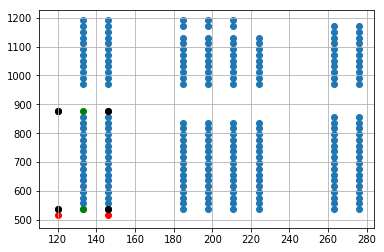

In [109]:
plt.scatter(x, y)
plt.scatter([i[0] for i in r[0]], [i[1] for i in r[0]], color = 'red')
plt.scatter([i[0] for i in r[1]], [i[1] for i in r[1]], color = 'green')
plt.scatter([i[0] for i in r[2]], [i[1] for i in r[2]], color = 'black')
plt.grid()
plt.show()

In [42]:
len(l_test)

221

In [44]:
len(pd.Series(x).value_counts())

8

In [46]:
pd.Series(x).value_counts().sort_index()

133    29
146    30
185    27
198    27
211    27
224    25
263    28
276    28
dtype: int64

In [56]:
pd.Series(x).value_counts().sort_index().index

Int64Index([133, 146, 185, 198, 211, 224, 263, 276], dtype='int64')

In [51]:
l = []
for i in range(len(pd.Series(x).value_counts()) - 1):
    l.append(abs(pd.Series(x).value_counts().sort_index().index[i] - pd.Series(x).value_counts().sort_index().index[i+1]))
l

[13, 39, 13, 13, 13, 39, 13]

In [57]:
pd.Series(y).value_counts().sort_index()

537     9
557     8
577     8
597     8
617     8
637     8
657     8
677     8
697     8
717     8
737     8
757     8
777     8
797     8
817     8
837     8
857     4
971     8
991     8
1011    8
1031    8
1051    8
1071    8
1091    8
1111    8
1131    8
1151    4
1171    7
1191    5
dtype: int64

In [58]:
l = []
for i in range(len(pd.Series(y).value_counts()) - 1):
    l.append(abs(pd.Series(y).value_counts().sort_index().index[i] - pd.Series(y).value_counts().sort_index().index[i+1]))
l

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 114,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20]

In [28]:
new_df[new_df['image'] == 'Aer_Lingus_Airbus_A330-200_plane4.jpg']

,image,lignes
40,Aer_Lingus_Airbus_A330-200_plane4.jpg,"[248, 249, 250, 251, 252, 253, 254, 255, 256, ..."


In [41]:
data.iloc[[248, 249, 250, 251, 252, 253, 254, 255, 256]]

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating,airline_aircraft
250,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,NORMAL,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,2,aer_lingus_Airbus_A330-200
251,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,BULKHEAD,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,4,aer_lingus_Airbus_A330-200
252,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,BULKHEAD,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,2,aer_lingus_Airbus_A330-200
253,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,BULKHEAD,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,1,aer_lingus_Airbus_A330-200
254,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,NORMAL,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,3,aer_lingus_Airbus_A330-200
255,SeatGuru,aer-lingus,Airbus A330-200,BUSINESS,long haul,23,271,Business,FLAT_BED,BULKHEAD,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,2,aer_lingus_Airbus_A330-200
256,SeatGuru,aer-lingus,Airbus A330-200,BUSINESS,long haul,23,271,Business,FLAT_BED,NORMAL,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,3,aer_lingus_Airbus_A330-200
257,SeatGuru,aer-lingus,Airbus A330-200,ECONOMY,long haul,248,271,Economy,STANDARD,EXIT_ROW,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,5,aer_lingus_Airbus_A330-200
258,SeatGuru,aer-lingus,Airbus A330-200,BUSINESS,long haul,23,271,Business,FLAT_BED,NORMAL,...,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,PORT,2,aer_lingus_Airbus_A330-200
